In [1]:
import tensorflow as tf
import cv2 as cv
import os
from keras.layers import Dropout,Conv2D,Flatten,MaxPooling2D,Dense
from keras.models import Sequential,Model
from keras.applications import InceptionV3

Using TensorFlow backend.


In [2]:
params = {
    'TRAIN_DATASET':'data/train_filtered',
    'VAL_DATASET':'data/val_filtered',
    'epochs':10,
    'batch_size':16,
    'target_size':[256,256]
}

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    channel_shift_range=0.3,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1. / 255,
)

val_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
)

In [4]:
train = train_datagen.flow_from_directory(
    directory = params['TRAIN_DATASET'],
    target_size=params['target_size'],
    class_mode='categorical',
    shuffle=True,
    batch_size=params['batch_size']
)

validation = train_datagen.flow_from_directory(
    directory = params['VAL_DATASET'],
    target_size=params['target_size'],
    class_mode='categorical',
    shuffle=True,
    batch_size=params['batch_size']
)

Found 8178 images belonging to 120 classes.
Found 2044 images belonging to 120 classes.


In [5]:
inception_model = InceptionV3(
   input_shape=(params['target_size'][0], params['target_size'][1], 3),
    include_top=False,
    weights="imagenet"
)

In [6]:
for layer in inception_model.layers:
    layer.trainable = False 

In [11]:
last_layer = inception_model.output

last_layer = Flatten()(last_layer)
last_layer = Dense(120,activation='softmax')(last_layer)

model = Model(inception_model.input, last_layer)

In [12]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
                             'Model/inception_model/inception_cnn.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

callbacks = [checkpoint]

In [13]:
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: &quot;model_2&quot;
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 127, 127, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 127, 127, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________

In [14]:
history = model.fit_generator(
    train,
    epochs=params['epochs'],
    validation_data=validation,
    callbacks=callbacks
)

Epoch 1/10
512/512 [==============================] - 216s 423ms/step - loss: 25.2022 - accuracy: 0.1652 - val_loss: 27.0564 - val_accuracy: 0.3337
Epoch 2/10
512/512 [==============================] - 206s 402ms/step - loss: 26.6090 - accuracy: 0.2686 - val_loss: 41.4286 - val_accuracy: 0.3870
Epoch 3/10
512/512 [==============================] - 199s 388ms/step - loss: 27.8205 - accuracy: 0.2925 - val_loss: 43.0379 - val_accuracy: 0.4066
Epoch 4/10
512/512 [==============================] - 209s 407ms/step - loss: 28.7400 - accuracy: 0.3200 - val_loss: 56.6950 - val_accuracy: 0.3982
Epoch 5/10
512/512 [==============================] - 203s 397ms/step - loss: 29.9282 - accuracy: 0.3346 - val_loss: 24.1611 - val_accuracy: 0.4266
Epoch 6/10
512/512 [==============================] - 206s 402ms/step - loss: 29.4280 - accuracy: 0.3533 - val_loss: 92.1122 - val_accuracy: 0.4159
Epoch 7/10
512/512 [==============================] - 207s 404ms/step - loss: 29.9642 - accuracy: 0.3688 - val_l

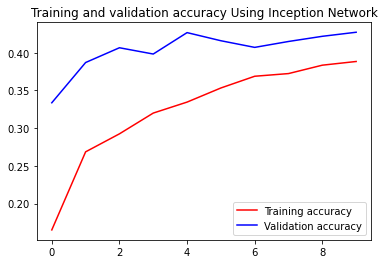

&lt;Figure size 432x288 with 0 Axes&gt;

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy Using Inception Network')
plt.legend()
plt.figure()


plt.show()

&lt;Figure size 432x288 with 0 Axes&gt;

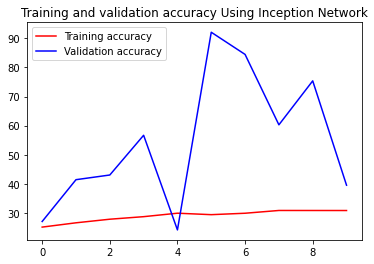

&lt;Figure size 432x288 with 0 Axes&gt;

In [16]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy Using Inception Network')
plt.legend()
plt.figure()